In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Emission cost (tCO2 eq/hour)
C_Fresnel = (2.1*3.6)/(1000*2.1)
C_Rubi = (4.2*3)/(1000*0.4)
C_GPU = 0.09/1000
C_Joliot = 215/1000

In [4]:
T_QPU, T_GPU, T_Joliot = 458, 884000, 67
print("Emissions from Fresnel = {} eq tCO2".format(T_QPU*C_Fresnel))
print("Emissions from Rubi = {} eq tCO2".format(T_QPU*C_Rubi))
print("Emissions from GPU = {} eq tCO2".format(T_GPU*C_GPU))
print("Emissions from GPU = {} eq tCO2".format(T_Joliot*C_Joliot))

Emissions from Fresnel = 1.6488 eq tCO2
Emissions from Rubi = 14.427 eq tCO2
Emissions from GPU = 79.55999999999999 eq tCO2
Emissions from GPU = 14.405 eq tCO2


In [95]:
S, T_pulse, N_runs = 10, 10**(-6), 52
f_Joliot, f_GPU = 7*10**(15), 5*10**(9)
def fct_S(L):
    return(np.sqrt(fct_L(L)))

def fct_L(L_tilde):
    return((L_tilde)**(1/3))

Tilde_L = [1000*i for i in range(1, 10**3+1)]
E_Fresnel = [N_runs*C_Fresnel*2**5*(fct_L(L)-fct_S(L))*(1+fct_S(L)*T_pulse)/(3600) for L in Tilde_L]
E_Rubi = [N_runs*C_Rubi*2**5*(fct_L(L)-fct_S(L))*(1+fct_S(L)*T_pulse)/(3600) for L in Tilde_L]
E_GPU = [N_runs*C_GPU*(2.496*10**5*L/10)/f_GPU*L*(L/100)/(3600) for L in Tilde_L]
E_Joliot = [N_runs*C_Joliot*(2.496*10**5*L/10)/f_Joliot*L*(L/100)/(3600) for L in Tilde_L]

In [ ]:
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(15, 5))
plt.title("Evolution of Carbon Emission for Time Series Forecasting \n as Data Size increases")
plt.xlabel("Size of the dataset")
plt.ylabel("tCO2 eq")
plt.xscale("log")
plt.yscale("log")
plt.plot(Tilde_L, E_Fresnel, label="QRC on Fresnel")
plt.plot(Tilde_L, E_Rubi, label="QRC on Rubi")
plt.plot(Tilde_L, E_GPU, label="RNN on GPU")
plt.plot(Tilde_L, E_Joliot, label="RNN on Joliot-Curie (HPC)")
#plt.xticks(Tilde_L)
plt.legend()
plt.savefig('Emission_Comparison.pdf')
plt.show()

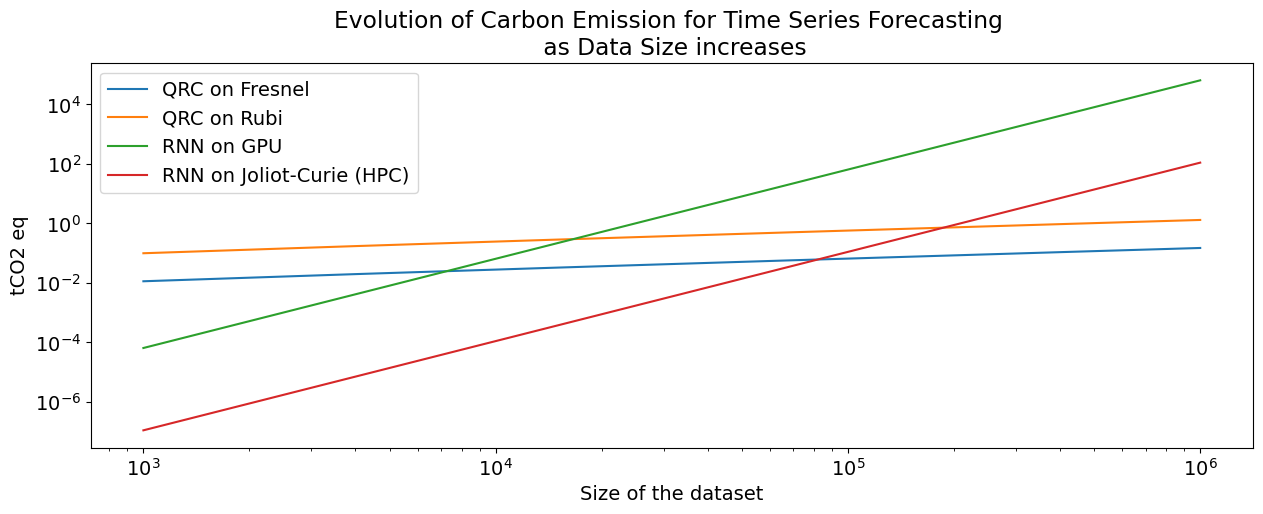

In [106]:
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(15, 5))
plt.title("Evolution of Carbon Emission for Time Series Forecasting \n as Data Size increases")
plt.xlabel("Size of the dataset")
plt.ylabel("tCO2 eq")
plt.xscale("log")
plt.yscale("log")
plt.plot(Tilde_L, E_Fresnel, label="QRC on Fresnel")
plt.plot(Tilde_L, E_Rubi, label="QRC on Rubi")
plt.plot(Tilde_L, E_GPU, label="RNN on GPU")
plt.plot(Tilde_L, E_Joliot, label="RNN on Joliot-Curie (HPC)")
#plt.xticks(Tilde_L)
plt.legend()
plt.savefig('Emission_Comparison.pdf')
plt.show()